<a href="https://colab.research.google.com/github/shekharkhandelwal1983/DS_ML_Model/blob/master/Titanic_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic Case study

In [0]:
from pyforest import *
import warnings
warnings.filterwarnings("ignore")

In [0]:
df = pd.read_csv("https://query.data.world/s/gb5wjsz5c76sgfyeas22h4loq7syqt")

In [324]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [325]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [327]:
(df.isnull().sum()/df.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [328]:
df.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [329]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [330]:
df["Fare"].quantile(.75)

31.0

In [331]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [0]:
df_new=df[df["Sex"]=="female"]

In [333]:
df_new.Survived.value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [334]:
233/891

0.2615039281705948

In [335]:
pd.crosstab(df.Survived, df.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


In [336]:
pd.crosstab(df.Survived, df.Sex, normalize=True)

Sex,female,male
Survived,,
0,0.090909,0.525253
1,0.261504,0.122334


In [337]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df["Age_group"]=pd.cut(df.Age, bins=[0,16,32, 48, 64, 200], labels=[0,1,2,3,4])

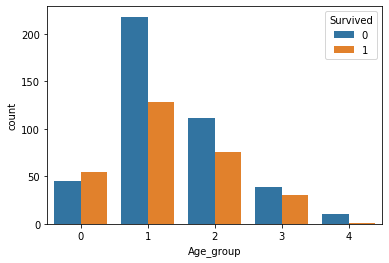

In [339]:
sns.countplot("Age_group", hue="Survived", data=df)

In [0]:
#missing value imputer

In [341]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1


In [0]:
# drop columns that are not needed for modelling
df.drop(["Age_group","PassengerId","Ticket"], axis=1, inplace=True)

In [343]:
df.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,NaN,S


In [0]:
df.drop("Name", inplace=True, axis=1)

In [345]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.25,NaN,S


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [347]:
100*(df.isnull().sum()/df.shape[0])

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [348]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
# Imputing embarked with S as it is present max times - mode imputation

In [0]:
df["Embarked"]=df["Embarked"].fillna("S")

In [351]:
100*(df.isnull().sum()/df.shape[0])

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.000000
dtype: float64

In [352]:
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,male,2.0,3,1,21.0750,NaN,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C


In [353]:
df.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
D              3
C22 C26        3
              ..
C62 C64        1
B30            1
E50            1
B37            1
E46            1
Name: Cabin, Length: 147, dtype: int64

In [0]:
df.drop("Cabin", axis=1, inplace=True)

In [355]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S


In [0]:
# use iterative imputer to impute age
# needs all the column in numerical format


In [0]:
#using replace method
df["Sex"].replace(["female","male"],[0,1], inplace=True)

In [357]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.25,S


In [0]:
#using Label encoder
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [0]:
df["Embarked"]=le.fit_transform(df["Embarked"])

In [360]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [0]:
from fancyimpute import IterativeImputer

In [0]:
#lets preserve the column names as fancy imputer will result in a numpy array
df_cols=df.columns

In [363]:
df_cols

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [364]:
IterativeImputer().fit_transform(df)

array([[ 0.    ,  3.    ,  1.    , ...,  0.    ,  7.25  ,  2.    ],
       [ 1.    ,  1.    ,  0.    , ...,  0.    , 71.2833,  0.    ],
       [ 1.    ,  3.    ,  0.    , ...,  0.    ,  7.925 ,  2.    ],
       ...,
       [ 0.    ,  3.    ,  0.    , ...,  2.    , 23.45  ,  2.    ],
       [ 1.    ,  1.    ,  1.    , ...,  0.    , 30.    ,  0.    ],
       [ 0.    ,  3.    ,  1.    , ...,  0.    ,  7.75  ,  1.    ]])

In [0]:
df_clean = pd.DataFrame(IterativeImputer().fit_transform(df))

In [366]:
df_clean.head(1)

,0,1,2,3,4,5,6,7
0,0.0,3.0,1.0,22.0,1.0,0.0,7.25,2.0


In [0]:
#replace column names
df_clean.columns=df_cols

In [368]:
df_clean.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.25,2.0


In [369]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.25,2


In [370]:
100*(df_clean.isnull().sum()/df_clean.shape[0])

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [0]:
# Iterative imputer converts everything to float
#convert datatype to integer for -  
for i in ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked']:
  df_clean[i]=pd.to_numeric(df_clean[i])
  df_clean[i]=df_clean[i].astype(int)

In [372]:
df_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [373]:
df_clean["Age"].describe()

count    891.000000
mean      29.267291
std       13.699411
min       -4.850393
25%       21.000000
50%       28.574185
75%       36.483583
max       80.000000
Name: Age, dtype: float64

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

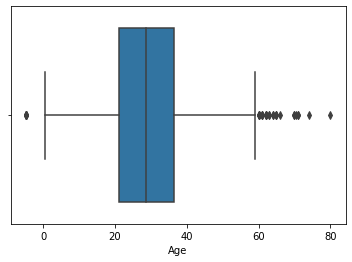

In [375]:
sns.boxplot(df_clean["Age"])

In [0]:
df_clean.drop(df.index[df_clean.Age<0], inplace=True)

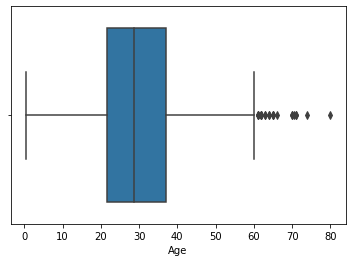

In [377]:
sns.boxplot(df_clean["Age"])

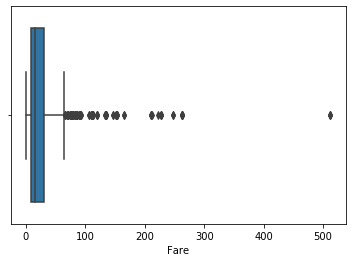

In [378]:
# outliers in Fare column
sns.boxplot(df_clean["Fare"])

In [379]:
df_clean[df_clean["Fare"]>100].count()

Survived    53
Pclass      53
Sex         53
Age         53
SibSp       53
Parch       53
Fare        53
Embarked    53
dtype: int64

In [380]:
df_clean.shape

(884, 8)

In [381]:
df_clean[df_clean["Fare"]>300].count()

Survived    3
Pclass      3
Sex         3
Age         3
SibSp       3
Parch       3
Fare        3
Embarked    3
dtype: int64

In [0]:
df_clean.drop(df_clean.index[df_clean["Fare"]>300], inplace=True)

In [383]:
df_clean.shape

(881, 8)

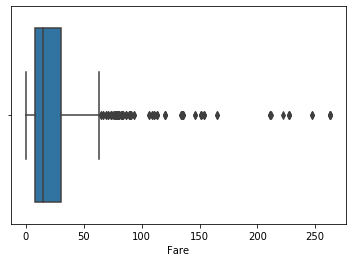

In [384]:
sns.boxplot(df_clean["Fare"])

In [0]:
## Data Prepearation for modelling
# Dummy variable for SibSp, Parch and Embarked

In [386]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 0 to 890
Data columns (total 8 columns):
Survived    881 non-null int64
Pclass      881 non-null int64
Sex         881 non-null int64
Age         881 non-null float64
SibSp       881 non-null int64
Parch       881 non-null int64
Fare        881 non-null float64
Embarked    881 non-null int64
dtypes: float64(2), int64(6)
memory usage: 61.9 KB


In [387]:
# req for pd.get_dummies is the column shud be in object format
# so convert categorical columns in object format
df_clean.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [0]:
for i in ['Pclass', 'SibSp', 'Parch', 'Embarked']:
  df_clean[i]=df_clean[i].astype(object)

In [389]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 0 to 890
Data columns (total 8 columns):
Survived    881 non-null int64
Pclass      881 non-null object
Sex         881 non-null int64
Age         881 non-null float64
SibSp       881 non-null object
Parch       881 non-null object
Fare        881 non-null float64
Embarked    881 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 61.9+ KB


In [0]:
# now we can use pd_dummies

In [0]:
cat_df=df_clean[['Pclass', 'SibSp', 'Parch', 'Embarked']]
df_dummies=pd.get_dummies(cat_df, drop_first=True)

In [392]:
df_dummies.head()

,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_1,Embarked_2
0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [393]:
df_clean.Embarked.value_counts()

2    639
0    165
1     77
Name: Embarked, dtype: int64

In [394]:
df_clean.drop(['Pclass', 'SibSp', 'Parch', 'Embarked'], axis=1, inplace=True)
df_clean=pd.concat([df_clean, df_dummies], axis=1)
df_clean.head(1)

,Survived,Sex,Age,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_1,Embarked_2
0,0,1,22.0,7.25,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1


In [395]:
df_clean.Survived.value_counts()

0    542
1    339
Name: Survived, dtype: int64

In [396]:
# Survival rate in thew current data
100*(df_clean.Survived.value_counts()/df_clean.shape[0])

0    61.520999
1    38.479001
Name: Survived, dtype: float64

In [0]:
# Divide data in X and y
X=df_clean.drop(["Survived"], axis=1)
y=df_clean["Survived"]

In [0]:
# Lets split the data in test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [399]:
X_train.shape

(616, 18)

In [400]:
X_test.shape

(265, 18)

In [0]:
# Scale the train data and test data independently
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [0]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [403]:
X_train.shape

(616, 18)

In [404]:
type(X_train)

numpy.ndarray

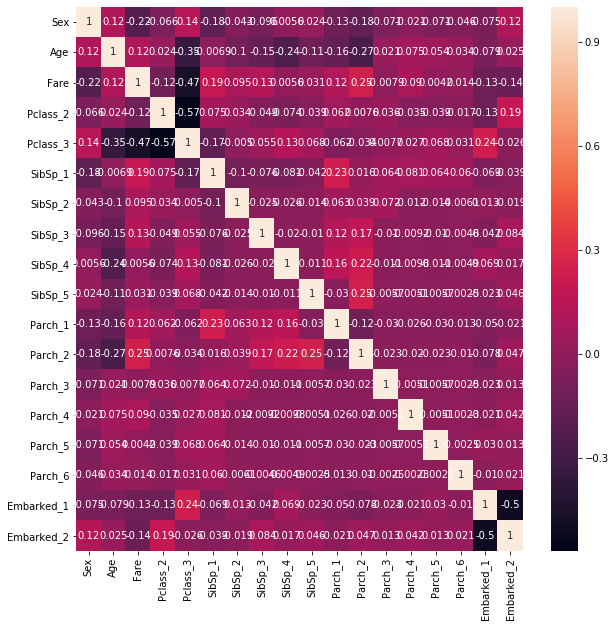

In [405]:
plt.figure(figsize=[10,10])
sns.heatmap(X.corr(), annot=True)

In [406]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [407]:
# Predicted probabilities
y_pred = logreg.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/sesitivity : {0}".format(metrics.recall_score(y_test, y_pred)))

Accuracy: 0.8075471698113208
Recall/sesitivity : 0.7254901960784313


In [408]:
logreg = LogisticRegression(penalty='l1')
logreg.fit(X_train, y_train)
# Predicted probabilities
y_pred = logreg.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/sesitivity : {0}".format(metrics.recall_score(y_test, y_pred)))

Accuracy: 0.8075471698113208
Recall/sesitivity : 0.7254901960784313


In [409]:
logreg = LogisticRegression(penalty='l2')
logreg.fit(X_train, y_train)
# Predicted probabilities
y_pred = logreg.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/sesitivity : {0}".format(metrics.recall_score(y_test, y_pred)))

Accuracy: 0.8075471698113208
Recall/sesitivity : 0.7254901960784313


In [410]:
logreg = LogisticRegression(penalty='l1', C=0.1)
logreg.fit(X_train, y_train)
# Predicted probabilities
y_pred = logreg.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/sesitivity : {0}".format(metrics.recall_score(y_test, y_pred)))

Accuracy: 0.8188679245283019
Recall/sesitivity : 0.7058823529411765


In [411]:
logreg = LogisticRegression(penalty='l1', C=0.1, class_weight='balanced')
logreg.fit(X_train, y_train)
# Predicted probabilities
y_pred = logreg.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/sesitivity : {0}".format(metrics.recall_score(y_test, y_pred)))

Accuracy: 0.7924528301886793
Recall/sesitivity : 0.7549019607843137


In [412]:
logreg = LogisticRegression(penalty='l1', C=0.1, class_weight={0:0.4, 1:0.6})
logreg.fit(X_train, y_train)
# Predicted probabilities
y_pred = logreg.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/sesitivity : {0}".format(metrics.recall_score(y_test, y_pred)))

Accuracy: 0.7962264150943397
Recall/sesitivity : 0.7450980392156863


In [413]:
params={'C':[0.0001, 0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1, 2], "penalty":['l1','l2'], "class_weight":["balanced", {0:0.4, 1:0.6}]}
logmodel=LogisticRegression()
from sklearn.model_selection import GridSearchCV
model=GridSearchCV(estimator=logmodel, cv=5, param_grid=params, scoring="recall")
model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 1, 2],
                         'class_weight': ['balanced', {0: 0.4, 1: 0.6}],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='

In [414]:
model.best_score_

0.8018530671456203

In [415]:
model.best_params_

{'C': 0.3, 'class_weight': 'balanced', 'penalty': 'l1'}

In [416]:
logreg = LogisticRegression(penalty='l1', C=0.3, class_weight='balanced')
logreg.fit(X_train, y_train)
# Predicted probabilities
y_pred = logreg.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/sesitivity : {0}".format(metrics.recall_score(y_test, y_pred)))

Accuracy: 0.7811320754716982
Recall/sesitivity : 0.7549019607843137


In [0]:
# Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [420]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/sesitivity : {0}".format(metrics.recall_score(y_test, y_pred)))

Accuracy: 0.7962264150943397
Recall/sesitivity : 0.6764705882352942


# RUN grid search to find best parameters

In [423]:
rf_model=RandomForestClassifier(class_weight='balanced', criterion='gini', min_samples_leaf= 1, min_samples_split= 16, n_estimators=700)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, y_pred)))
print("Recall/sesitivity : {0}".format(metrics.recall_score(y_test, y_pred)))

Accuracy: 0.8339622641509434
Recall/sesitivity : 0.7647058823529411


In [0]:
#Feature Importance

In [425]:
rf_model.feature_importances_

array([0.33020289, 0.18354333, 0.2354338 , 0.02278573, 0.10341144,
       0.02368802, 0.00709121, 0.0077744 , 0.00845472, 0.00331657,
       0.01888937, 0.01147025, 0.00157987, 0.00380322, 0.0029985 ,
       0.        , 0.01165783, 0.02389886])

In [426]:
pd.concat((pd.DataFrame(X.columns, columns=['Variables']),pd.DataFrame(rf_model.feature_importances_, columns=["Importance"])), axis=1).sort_values(by="Importance", ascending=False)

,Variables,Importance
0,Sex,0.330203
2,Fare,0.235434
1,Age,0.183543
4,Pclass_3,0.103411
17,Embarked_2,0.023899
5,SibSp_1,0.023688
3,Pclass_2,0.022786
10,Parch_1,0.018889
16,Embarked_1,0.011658
11,Parch_2,0.011470
